# AMATH 352B

## Homework Assignment #7 - due 5/27/2022

This Jupyter Notebook consists of several cells.  Some of the cells are **Markdown** cells, and some of the cells are **Code** cells.

Once you have honed your Notebook to the point where you're ready to turn it in, convert the Notebook to HTML and upload both the Notebook (the .ipynb file) and the HTML version of it to Canvas.  There are potentially issues in the conversion involving figures, graphics, and imported files to solve, so leave yourself enough time to get this done.

In [1]:
from math import *
import numpy as np
from scipy.linalg import lu_factor, lu_solve
from scipy.linalg import qr, solve_triangular
import matplotlib as mpl
import matplotlib.pyplot as plt

## Problem #1

Compute the singular value decomposition of the following matrix by calling the numpy routine ``np.linalg.svd``:

$$\begin{pmatrix}1 & 2 & 3\cr 4 & 5 & 6\cr\end{pmatrix}$$

In [2]:
A = np.array(([1, 2, 3],
              [4, 5, 6]))
u, s, v = np.linalg.svd(A)
print("U:",u)
print("S:",s)
print("V:",v)

U: [[-0.3863177   0.92236578]
 [-0.92236578 -0.3863177 ]]
S: [9.508032   0.77286964]
V: [[-0.42866713 -0.56630692 -0.7039467 ]
 [-0.80596391 -0.11238241  0.58119908]
 [ 0.40824829 -0.81649658  0.40824829]]


## Problem #2

Solve the following linear system of equations by computing the singular value decomposition of the matrix

$$\begin{pmatrix}1 & 0 & 2\cr 2 & 0 & 1\cr 1 & 1 & 1\cr\end{pmatrix}
\begin{pmatrix}x_0\cr x_1\cr x_2\cr\end{pmatrix}=
\begin{pmatrix}7\cr 5\cr 6\cr\end{pmatrix}$$

In [3]:
A = np.array(([1, 0, 2],
              [2, 0, 1],
              [1, 1, 1]))
b = np.array(([7], [5], [6]))
u, s, v = np.linalg.svd(A)
utb = u.T @ b
utb[0] /= s[0]
utb[1] /= s[1]
utb[2] /= s[2]
answer = v.T @ utb
print(answer)

[[1.]
 [2.]
 [3.]]


## Problem #3

* Determine the rank of the following matrix by computing its singular values

$$\begin{pmatrix}2 & 1 & 1 & 1\cr
1 & 2 & 1 & 1\cr
1 & 1 & 2 & 1\cr
2 & 0 & 2 & 1\cr\end{pmatrix}$$

In [4]:
A = np.array(([2, 1, 1, 1],
              [1, 2, 1, 1],
              [1, 1, 2, 1],
              [2, 0, 2, 1]))
u, s, v = np.linalg.svd(A)
print (s)
rank = 0
for i in range (s.size):
    if (abs(s[i]) > sqrt(np.finfo(float).eps)):
        rank += 1
        
print("Rank =", rank)

[5.10750724e+00 1.70685962e+00 1.00000000e+00 1.83865221e-16]
Rank = 3


## Problem #4

Compute

$$\left\|\begin{pmatrix}3 & 1 & 0 & 0\cr
1 & 7 & 1 & 0\cr
0 & 1 & 7 & 1\cr
0 & 0 & 1 & 12\cr\end{pmatrix}\right\|_2$$

In [5]:
A = np.array(([3, 1, 0, 0],
              [1, 7, 1, 0],
              [0, 1, 7, 1],
              [0, 0, 1, 12]))
u, s, v = np.linalg.svd(A)
print ("2 norm =", s[0])

2 norm = 12.199862348665095


## Problem #5

For the matrix given in Problem #4, determine its condition number using the matrix 2-norm

In [6]:
answer = s[0] / s[s.size - 1]
print ("Condition number =", answer)

Condition number = 4.435505344103019


## Problem #6

What are the singular values of the $10 \times 10$ tridiagonal matrix whose diagonal entries are $2$ on the diagonal and whose entries are $1$ on the sub- and sup-diagonals?

In [7]:
A = np.array(([2, 1, 0, 0, 0, 0, 0, 0, 0, 0],
              [1, 2, 1, 0, 0, 0, 0, 0, 0, 0],
              [0, 1, 2, 1, 0, 0, 0, 0, 0, 0],
              [0, 0, 1, 2, 1, 0, 0, 0, 0, 0],
              [0, 0, 0, 1, 2, 1, 0, 0, 0, 0],
              [0, 0, 0, 0, 1, 2, 1, 0, 0, 0],
              [0, 0, 0, 0, 0, 1, 2, 1, 0, 0],
              [0, 0, 0, 0, 0, 0, 1, 2, 1, 0],
              [0, 0, 0, 0, 0, 0, 0, 1, 2, 1],
              [0, 0, 0, 0, 0, 0, 0, 0, 1, 2]))

u, s, v = np.linalg.svd(A)
print("Singular values:", s)

Singular values: [3.91898595 3.68250707 3.30972147 2.83083003 2.28462968 1.71537032
 1.16916997 0.69027853 0.31749293 0.08101405]


## Problem #7

Stella is a terrific amateur astronomer, and she has recently discovered a new asteroid.  After taking careful measurements, she determined the following positions for the asteroid over the course of 12 months:

| $x$ | $y$ | $z$ |
|-----|-----|-----|
| 4.000 | 4.000 | 4.000 |
| 2.964 | 3.964 | 3.464 |
| 1.134 | 2.866 | 2.000 |
| -1.000 | 1.000 | 0.000 |
| -2.866 | -1.134 | -2.000 |
| -3.964 | -2.964 | -3.464 |
| -4.000 | -4.000 | -4.000 |
| -2.964 | -3.964 | -3.464 |
| -1.134 | -2.866 | -2.000 |
| 1.000 | -1.000 | 0.000 |
| 2.866 | 1.134 | 2.000 |
| 3.964 | 2.964 | 3.464 |

The 12 measurements represent nearly one full orbit of the asteroid about its center in the coordinate system in which Stella has taken the measurements.  She would like to compute both the eccentricity of the elliptical orbit that she has observed as well as the normal vector to the orbital plane in the coordinate system she has taken her measurements in.  Because of all your recent experience with computational linear algebra, she has asked for your help computing these two things.

Here are some facts that may help you determine how best to help Stella:

* Stella's measurements are in **astronomical units**
* One **astronomical unit** is the average distance of the earth from the sun
* A normal to a plane is a vector which is perpendicular to all vectors in the plane
* Nigel is an expert in celestial navigation, but these days he usually relies on GPS
* The eccentricity of an ellipse is the ratio of the semimajor axis to the semiminor axis
* Your instructor often assigns problems related to the material covered in class during the previous week
* On clear nights, Charles can sometimes spot the planets during his moonlight fishing trips
* There are no currents to compensate for in space
* Your instructor has rigged this problem so that no preprocessing or transformation of the data is required in order to solve it

Eccentricity 4.898979485566357
Normal Vector: [ 1.  1. -2.]


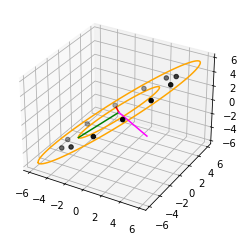

In [8]:
xcoord = np.array([4.000, 2.964, 1.134, -1.000, -2.866, -3.964, -4.000, -2.964, -1.134, 1.000, 2.866, 3.964])
ycoord = np.array([4.000, 3.964, 2.866, 1.000, -1.134, -2.964, -4.000, -3.964, -2.866, -1.000, 1.134, 2.964])
zcoord = np.array([4.000, 3.464, 2.000, 0.000, -2.000, -3.464, -4.000, -3.464, -2.000, 0.000, 2.000, 3.464])

# Find P-bar
pbar = np.zeros(3)
for pt in xcoord:
    pbar[0] += pt
for pt in ycoord:
    pbar[1] += pt
for pt in zcoord:
    pbar[2] += pt
    
pbar /= len(xcoord.T)
#print("pbar:", pbar)

# Construct the matrix of point[i] - pbar[i]
A = np.zeros((xcoord.size, 3))
for i in range(xcoord.size):
    A[i,0] = xcoord[i] - pbar[0]
    A[i,1] = ycoord[i] - pbar[1]
    A[i,2] = zcoord[i] - pbar[2]

A = A.T

# SVD on matrix A
u, s, vt = np.linalg.svd(A)

SD = s / sqrt(len(xcoord))
#print("SD:", SD)

# Compute standard deviations
end0 = pbar + SD[0] * u.T[0]
end1 = pbar + SD[1] * u.T[1]

# Make plot, draw 1st standard deviation orbit
ax = plt.axes(projection='3d')

for nsigma in range(1, 3):
    ellpts = np.array([pbar + nsigma * SD[0] * cos(th) * u.T[0] + nsigma * SD[1] * sin(th) * u.T[1]
                       for th in np.linspace(0, 2 * pi, 101)])
    ax.plot3D(ellpts.T[0,:], ellpts.T[1,:], ellpts.T[2,:], 'orange')

# Data for three-dimensional scattered points
#ax.scatter3D(pbar[0], pbar[1], pbar[2], color = 'black');
ax.plot3D([pbar[0], end0[0]], [pbar[1], end0[1]], [pbar[2], end0[2]], 'green')
ax.plot3D([pbar[0], end1[0]], [pbar[1], end1[1]], [pbar[2], end1[2]], 'red')
ax.scatter3D(xcoord, ycoord, zcoord, color='black');

# Eccentricity
eccentricity = np.linalg.norm(np.array(end0 - pbar)) / np.linalg.norm(np.array(end1 - pbar))
print("Eccentricity", eccentricity)

# Normal Vector
Majorvector = np.array((end0[0] - pbar[0], end0[1] - pbar[1], end0[2] - pbar[2]))
Minorvector = np.array((end1[0] - pbar[0], end1[1] - pbar[1], end1[2] - pbar[2]))

#print (MajMinMatrix)
Normalvector = np.cross(Majorvector, Minorvector)

ax.plot3D([pbar[0], Normalvector[0]], [pbar[1], Normalvector[1]], [pbar[2], Normalvector[2]], color='magenta')
Normalvector = Normalvector / Normalvector[0]
print("Normal Vector:", Normalvector)